**Group # 1 - Section 74984**

Arwa Alabdulkarim 441201304

Reef Althunayan 441201390


Sadeem Almujil 442202286


# **Phase 3 : Unupervised learning**
 

**unsupervised learning** aims to partition datasets into clusters where data in each cluster ideally share some common characteristics.

In k-means clustering, the objective is to partition a dataset into k distinct clusters, where each data point belongs to the cluster with the closest mean (centroid). 

Since determining the optimal value of k requires comparing various suggested numbers of k, and after testing multiple values of k, it may be determined that a range of k between 2-10 provides the most suitable results, as demonstrated below using different evaluation methods and metrics.

In [203]:
# Import the required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [204]:
# Read CSV file
df = pd.read_csv('train_after_cleanning.csv')

# Print the first 5 rows of the Dataset
df.head()

,premise,hypothesis,label,premise_vectors,hypothesis_vectors
0,"['and', 'these', 'comments', 'were', 'consider...","['the', 'rules', 'developed', 'in', 'the', 'in...",0,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...,[-0.22748104 -0.03450689 0.564092 -0.687629...
1,"['these', 'are', 'issues', 'that', 'we', 'wres...","['practice', 'groups', 'are', 'not', 'permitte...",2,[-2.2742710e-01 -3.6777418e-02 5.6592155e-01 ...,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...
2,"['you', 'know', 'they', 'cant', 'really', 'def...","['they', 'cant', 'defend', 'themselves', 'beca...",0,[-2.27337718e-01 -4.05399986e-02 5.68953395e-...,[-0.22807117 -0.00966471 0.5440747 -0.666615...
3,"['from', 'cockpit', 'country', 'to', 'st', 'an...","['from', 'st', 'anns', 'bay', 'to', 'cockpit',...",2,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...
4,"['look', 'its', 'your', 'skin', 'but', 'youre'...","['the', 'boss', 'will', 'fire', 'you', 'if', '...",1,[-2.2737969e-01 -3.8772728e-02 5.6752932e-01 ...,[-0.22769913 -0.02532609 0.55669427 -0.679863...


In [205]:
#define the ground truth label for Bcubed
ground_truth_labels = df.iloc[:,2].values
print("ground truth labels", ground_truth_labels)

# drop the uselesscolumns
df = df.drop(df.columns[[0,1,2]], axis=1)
df.head()

ground truth labels [0 2 0 ... 0 0 2]


,premise_vectors,hypothesis_vectors
0,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...,[-0.22748104 -0.03450689 0.564092 -0.687629...
1,[-2.2742710e-01 -3.6777418e-02 5.6592155e-01 ...,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...
2,[-2.27337718e-01 -4.05399986e-02 5.68953395e-...,[-0.22807117 -0.00966471 0.5440747 -0.666615...
3,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...
4,[-2.2737969e-01 -3.8772728e-02 5.6752932e-01 ...,[-0.22769913 -0.02532609 0.55669427 -0.679863...


In [206]:
#convert from string to float and put them in a list 
def convertStringToList(string_data):
    new_string = re.sub(r"[\[\]]", "", string_data)
    new_data =  [  float(item)  for item in new_string.split(' ') if item!=''] 
    return  new_data
def printDef(item1,item2):
    item1 = convertStringToList(item1)
    item2 = convertStringToList(item2)
    return [item1,item2]
    
#declare the array X and assign the values to it
X = []
for index,value in df.iterrows():
    X.append( printDef(value['premise_vectors'],value['hypothesis_vectors']) )

# Set the random seed to a specific value
    np.random.seed(42) 
    


We will use the following evaluation methods and metrics to compare and discuss the results of applying different sizes of K:


-  **BCubed precision and recall:**  evaluates the precision and recall for every object in a clustering on the data set according to ground truth.

1.      BCubed precision: The precision of an object indicates how many other objects in the same cluster belong to the same category as the object

2.      BCubed recall: The recall of an object reflects how many objects of the same category are assigned to the same cluster



   
  

   








  





          







* **Silhouette
coefficient**: intrinsic method that evaluate a 
clustering by examining how well the clusters 
are separated and how compact the clusters 
are.

*  **total within-cluster sum of square WCSS:** it calculates the sum of the squared Euclidean distances between each data point and its respective cluster centroid,The WCSS  quantifies the compactness or tightness of the clusters formed by the k-means algorithm.






### **BCubed precision and recall**


**BCubed precision=** (number of items from same category in its cluster/ number of items in its cluster)/n

**BCubed recall=** (number of items from same category in its cluster/
number of items in its category )/n

where **n** is the number of items in the dataset






In [207]:
def calculate_bcubed_precision(cluster_assignments, true_labels):
    precision_scores = []
    for item in cluster_assignments:
        true_cluster = true_labels[item]
        matches_same_cluster = sum(1 for i in cluster_assignments if true_labels[i] == true_cluster)
        total_matches = len(cluster_assignments)
        precision_scores.append(matches_same_cluster / total_matches)
    bcubed_precision = sum(precision_scores) / len(cluster_assignments)
    return bcubed_precision


def calculate_bcubed_recall(cluster_assignments, true_labels):
    recall_scores = []
    for item in cluster_assignments:
        true_cluster = true_labels[item]
        matches_same_cluster = sum(1 for i in cluster_assignments if true_labels[i] == true_cluster)
        total_matches = sum(1 for i in true_labels if true_labels[i] == true_cluster)
        try:
            recall_scores.append(matches_same_cluster / total_matches)
        except:
            recall_scores.append(0)
        
    bcubed_recall = sum(recall_scores) / len(cluster_assignments)
    return bcubed_recall

### **Applying** **K-means**

In [208]:
# Reshaping the array to use it in clustering
X = np.array(X)
#print(X)
x,y,z = X.shape
print("X shape", X.shape)


X shape (3234, 2, 100)


In [209]:
RESHAPED_X = np.reshape( X,(x,y*z) )
print(RESHAPED_X)

[[-0.22779953 -0.0211      0.553289   ... -1.0296712   0.6963184
  -0.01380569]
 [-0.2274271  -0.03677742  0.56592155 ... -1.0138981   0.67923385
  -0.02359509]
 [-0.22733772 -0.04054     0.56895339 ... -1.0004447   0.6646618
  -0.03194488]
 ...
 [-0.22712039 -0.04968823  0.57632494 ... -1.02440953  0.70732826
  -0.00602897]
 [-0.23917708 -0.04967493  0.52714461 ... -1.0188701   0.68461925
  -0.0205093 ]
 [-0.23310827 -0.03680083  0.5427685  ... -1.0078795   0.67271477
  -0.02733052]]


In [210]:
# Define the number of clusters

# Initialize a dict with the lists to store our evaluation methods values
scores = {'silhouette_score':[],'WCSS':[],'recall':[],'precision':[]}
 
# Define the range of k values to test
k_values = range(2,11) 

for k in k_values:
    # Create a KMeans instance and fit the data
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    kmeans.fit(RESHAPED_X) # data 
    
    # Retrieve the cluster labels for each data point
    labels = kmeans.labels_ 
    print("cluster" ,k ," label: ", labels)
    
    np.random.seed(42) # Set the random seed to a specific value 

    # Compute the silhouette score and append it into a dict
    score = silhouette_score(RESHAPED_X, labels)
    scores['silhouette_score'].append(score)
    

    # Compute the WCSS for the current clustering
    scores['WCSS'].append(kmeans.inertia_)
   
   
    # Compute the BCubed precision and recall scores
    precision = calculate_bcubed_precision(labels, ground_truth_labels)
    recall = calculate_bcubed_recall(labels, ground_truth_labels)
    
    scores['recall'].append(recall)
    scores['precision'].append(precision)
    


cluster 2  label:  [0 0 0 ... 0 0 0]
cluster 3  label:  [0 0 0 ... 0 0 0]
cluster 4  label:  [0 0 0 ... 0 0 0]
cluster 5  label:  [0 0 0 ... 0 0 0]
cluster 6  label:  [3 0 3 ... 0 0 3]
cluster 7  label:  [3 0 0 ... 0 0 3]
cluster 8  label:  [0 0 3 ... 0 0 0]
cluster 9  label:  [0 0 3 ... 0 0 0]
cluster 10  label:  [0 0 3 ... 0 0 0]


### **Plot the curves**

In [211]:
# prepare the plot
def plot_score(scores,ylabel,color):
    k_values = [i for i in range(2,len(scores)+2)]
    plt.plot( k_values , scores, marker='o',color=color)
    plt.xlabel("Number of Clusters")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} for Different Cluster Numbers")
    plt.xticks(np.arange(2, len(scores)+2, 1))
    plt.show()


### **silhouette scores plot**

**silhouette coefficient** of an object o is defined as:

**(b(o)- a(o)) / max{ a(o), b(o) }**

The value of **a(o)** reflects the compactness of the cluster to which **o** belongs.

 The smaller the value, the more compact the cluster. 
 
 The value of **b(o)** captures the degree to which o is separated from other clusters.
 
 The larger **b(o)** is, the more separated **o** is from 
other 
clusters.

In [212]:
#print silhouette list
print( scores['silhouette_score'] )

[0.5954851240591986, 0.4017136316482922, 0.31111818769403665, 0.317366421621683, 0.23953974383038878, 0.2892239947279322, 0.2552184028533878, 0.24794120577291018, 0.25147643345524984]


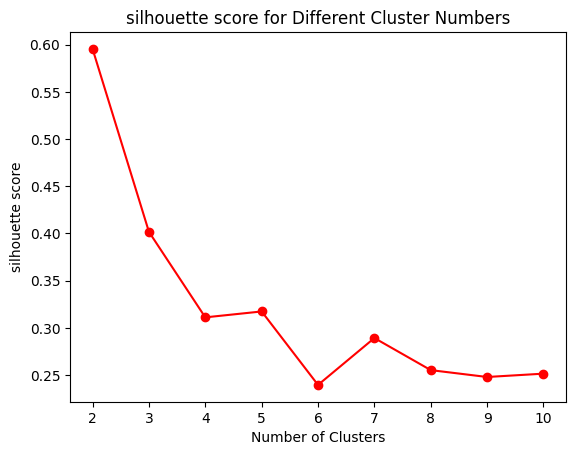

In [213]:
# Plot the silhouette scores
plot_score(scores=scores['silhouette_score'],ylabel='silhouette score',color='red')


 
 The silhouette score ranges from -1 to 1, where a score of 1 means that the clusters are very nice, while a score of 0 means that clusters are overlapping and as we can see ,the best k is 2 since it has the heigher silhoutte score

### **WCSS scores plot**

In [214]:
#print wcss list 
print( scores['WCSS'] )

[424.9951562729565, 330.00269610424226, 284.52941115013084, 255.65462084026842, 235.06140361301863, 220.8764954451771, 205.61975189974515, 192.80019237675646, 179.32767333720534]


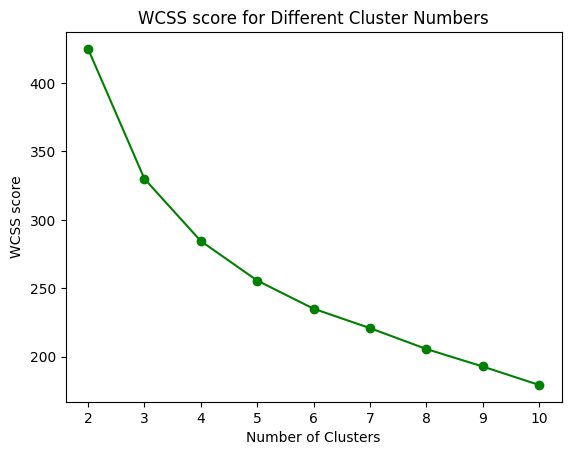

In [215]:
plot_score(scores=scores['WCSS'],ylabel='WCSS score',color='green') # elbow method

When we analyze the graph , we can see that the graph will rapidly change at a point and thus creating an elbow shape, from this point, the graph moves almost to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters which is k=3 in our dataset since the big distance difference between 3 and 2 is the greater

### **BCubed precision scores plot**

In [216]:
#print precision list 
print( scores['precision'] )

[0.7813659674248086, 0.9003935076025769, 0.5720919390413042, 0.5030751267167823, 0.44251209226031113, 0.5559512049042709, 0.4476626092051436, 0.4271190569891823, 0.4149569987099974]


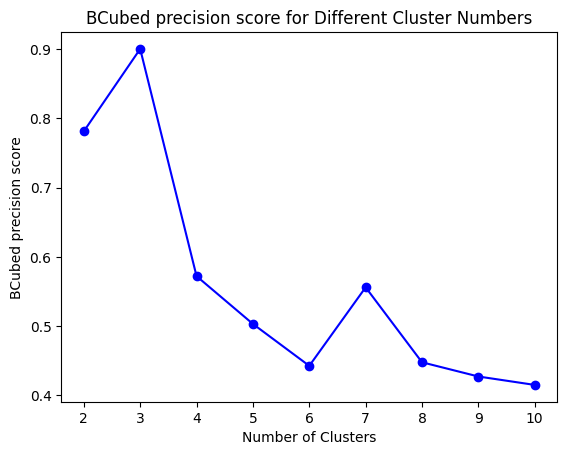

In [217]:
plot_score(scores=scores['precision'],ylabel='BCubed precision score',color="blue") 

### **BCubed recall scores plot**

In [160]:
#print recall list 
print( scores['recall'] )

[1.1810340613061916, 1.3364942067144423, 1.0008839212755756, 0.8170064990846945, 0.7891066205798044, 0.8966568555825692, 0.7146187535949315, 0.7183538863544646, 0.7575169264017032]


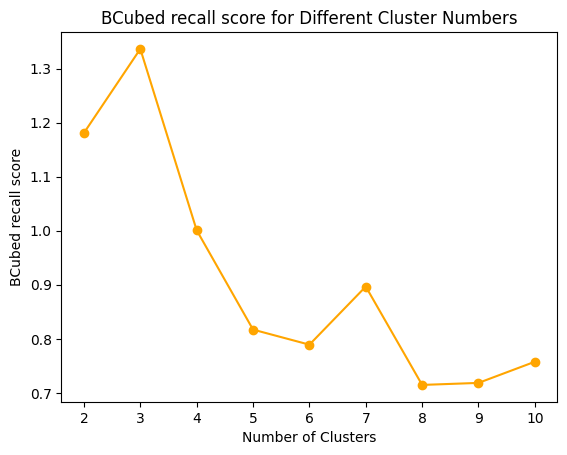

In [218]:
plot_score(scores=scores['recall'],ylabel='BCubed recall score',color="orange")

The 2 graphs above represent the BCubed precision and recall in differnt Ks, we need to choose the k that gives the highest BCubed recall and pricession and we can clearly see that k=3 is has the biggest value

# **conclusion**

we did use the unsupervised learning algorithm (K-means clustering) to our dataset , we use 9 different sizes of K from 2 to 10, then we did compare between them with different evaluation methods and metrics 

we use Silhouette
coefficient and it gives us K=2 as the optimal number of clusters or K as we discussed above

we also use total within-cluster sum of square (WCSS) which gives us different optimal K, it gives us K=3 as the optimal number of clusters or K

we tried to use BCubed precision and recall and they all give us K=3 as the optimal number of clusters or K 

now, we have 3 evaluation methods and metrics that give us 3 as the optimal number of clusters (WCSS , BCubed presision,  BCubed recall) and one evaluation method that give us 2 as the optimal number of clusters(Silhouette
coefficient)  

so based on the results, the most repeated number of cluster was K=3, and we decide to take it as our dataset's optimal K.  